In [1]:
import chardet as chardet
import pandas as pd


In [3]:
with open("aducate.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result 

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

In [4]:
# pandas 讀檔
file = pd.read_csv('aducate.csv', encoding= 'utf-8')

In [62]:
# 總資料數：
print(len(file))

1100


In [5]:
# Q1~Q6 ： 共有幾件款項 分別來自 台北市 新北市 台中市 桃園市 台南市 高雄市 ：

filtered_file_taipei = file.loc[file['受款單位'] == '臺北市政府教育局']
filtered_file_newtaipei = file.loc[file['受款單位'] == '新北市政府教育局']
filtered_file_taichung = file.loc[file['受款單位'] == '臺中市政府教育局']
filtered_file_taoyuan = file.loc[file['受款單位'] == '桃園市政府']
filtered_file_kaohsiung = file.loc[file['受款單位'] == '高雄市政府教育局']
filtered_file_tainan = file.loc[file['受款單位'] == '臺南市政府教育局']

print('共有：', len(filtered_file_taipei),'件受款來自臺北市政府教育局')
print('共有：', len(filtered_file_newtaipei),'件受款來自臺北市政府教育局')
print('共有：', len(filtered_file_taichung),'件受款來自臺中市政府教育局')
print('共有：', len(filtered_file_taoyuan),'件受款來自桃園市政府')
print('共有：', len(filtered_file_tainan),'件受款來自台南市政府教育局')
print('共有：', len(filtered_file_kaohsiung),'件受款來自高雄市政府教育局')



共有： 5 件受款來自臺北市政府教育局
共有： 14 件受款來自臺北市政府教育局
共有： 19 件受款來自臺中市政府教育局
共有： 20 件受款來自桃園市政府
共有： 16 件受款來自台南市政府教育局
共有： 20 件受款來自高雄市政府教育局


In [85]:
# Q7: 有幾件科目為'國民及學前教育行政及督導'
# Q8: 有幾件科目為'國立高級中等學校教學與訓輔輔助'

filtered_file_sub1 = file.loc[file['科目名稱'] == '國民及學前教育行政及督導']
filtered_file_sub2 = file.loc[file['科目名稱'] == '國立高級中等學校教學與訓輔輔助']

print('共有：', len(filtered_file_sub1),'件科目為國民及學前教育行政及督導')
print('共有：', len(filtered_file_sub2),'件科目為國立高級中等學校教學與訓輔輔助')

共有： 810 件科目為國民及學前教育行政及督導
共有： 290 件科目為國立高級中等學校教學與訓輔輔助


In [6]:
# Q9：超過十億的金額有幾筆
# Q10：金額介於十億至一億有幾筆
# Q11: 金額低於一億有幾筆

amount = [0,0,0]
for index, row in file.iterrows():
    money = int(row[4].replace(',',''))
    if money >= 1000000000 :
        amount[0] += 1
    elif money >= 100000000 :
        amount[1] += 1
    else:
        amount[2] += 1 
        
print('金額超過十億：',amount[0], '筆')
print('金額介於十億至一億：',amount[1], '筆')
print('金額低於一億：',amount[2], '筆')
        


金額超過十億： 4 筆
金額介於十億至一億： 25 筆
金額低於一億： 1071 筆


In [7]:
# 將所有資料化為長條圖表 y軸為金額 x軸為日期 查看相對應的受款單位：

import plotly.express as px
fig = px.bar(file, x= '執行日期', y= '金額 ', color= '受款單位', barmode='group')
fig.show()

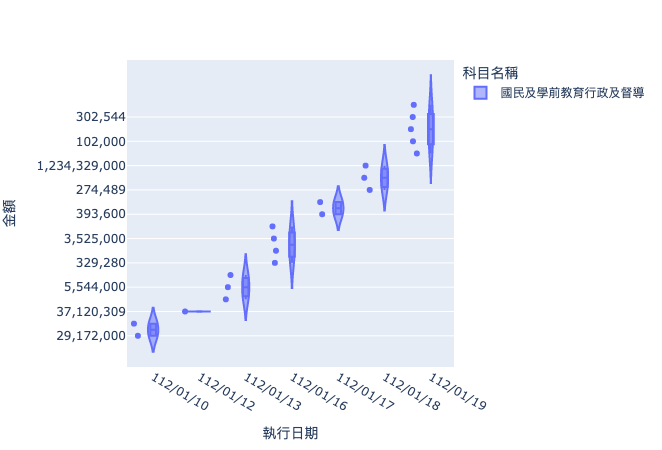

In [8]:

# 對受款單位為高雄政府教育局的資料做小提琴圖：

import plotly.express as px
from IPython.display import Image
filtered_file_kaohsiung = file.loc[file['受款單位'] == '高雄市政府教育局']
filtered_file_kaohsiung.to_csv('filtered_file_kaohsiung', index=False)
kaohsiung_file = pd.read_csv('filtered_file_kaohsiung', encoding= 'utf-8')

fig = px.violin(kaohsiung_file, x= '執行日期', y= '金額 ', color= '科目名稱', box= True, points='all', hover_data= kaohsiung_file.columns)
fig.show()

Image(filename='小提琴圖.png')